In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from typing import List

warnings.filterwarnings("ignore")
%matplotlib inline

TRAIN_FILE = '../data/train.parquet'
TEST_FILE = '../data/test.parquet'
SAMPLE_SUBMISSION = '../data/sample_submission.csv'


In [52]:
def set_display() -> None:
    """Function sets display options for charts and pd.DataFrames."""
    plt.style.use('fivethirtyeight')
    plt.rcParams['figure.figsize'] = 12, 8
    plt.rcParams.update({'font.size': 14})
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    pd.options.display.float_format = '{:.4f}'.format


def dataset_info(df: pd.DataFrame):
    print(df.info())
    
    print("\nПропуски в полях:")
    print(df.isnull().sum())

    missing_values = df['values'].apply(lambda x: any(pd.isnull(v) for v in x))
    print(f"Количество строк с пропусками в 'values': {missing_values.sum()}")


    

In [11]:
train_df = pd.read_parquet(TRAIN_FILE, engine='auto')
test_df = pd.read_parquet(TEST_FILE, engine='auto')
sample_submission = pd.read_csv(SAMPLE_SUBMISSION)

In [28]:
train_df

,id,dates,values,label
0,19114,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-1.86, 0.79, 1.4, 0.15, 0.0, -1.24, -1.46, 3....",0.0
1,22769,"[2016-05-01, 2016-06-01, 2016-07-01, 2016-08-0...","[-1.04, -3.48, 0.05, -0.13, -0.01, 0.03, 0.27,...",1.0
2,76935,"[2017-03-01, 2017-04-01, 2017-05-01, 2017-06-0...","[0.28, 0.63, 0.06, 0.96, -1.4, -0.3, 1.62, 1.1...",0.0
3,66297,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-0.33, 0.58, 1.1, -0.56, -0.95, -0.61, -0.7, ...",0.0
4,2191,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[1.31, 0.5, -0.54, 0.95, 0.65, 0.83, -1.55, -0...",0.0
...,...,...,...,...
79995,71474,"[2018-10-01, 2018-11-01, 2018-12-01, 2019-01-0...","[-0.15, -1.13, -0.87, 0.49, 0.87, 1.67, 1.91, ...",0.0
79996,36908,"[2016-07-01, 2016-08-01, 2016-09-01, 2016-10-0...","[-0.35, -1.31, 0.11, 1.46, 1.28, 1.12, 1.78, 1...",1.0
79997,63517,"[2016-03-01, 2016-04-01, 2016-05-01, 2016-06-0...","[-0.78, -2.27, -1.85, -0.67, -1.2, -2.02, 0.12...",0.0
79998,94731,"[2016-02-01, 2016-03-01, 2016-04-01, 2016-05-0...","[-2.29, -2.85, 0.92, -0.83, -1.75, -1.81, -2.2...",0.0


In [46]:
dataset_info(train_df)

<class 'pandas.core.frame.DataFrame'>
Index: 79912 entries, 0 to 79999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      79912 non-null  int64  
 1   dates   79912 non-null  object 
 2   values  79912 non-null  object 
 3   label   79912 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.0+ MB
None

Пропуски в полях:
id        0
dates     0
values    0
label     0
dtype: int64
Количество строк с пропусками в 'values': 0


In [47]:
dataset_info(test_df)

<class 'pandas.core.frame.DataFrame'>
Index: 19979 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      19979 non-null  int64 
 1   dates   19979 non-null  object
 2   values  19979 non-null  object
dtypes: int64(1), object(2)
memory usage: 624.3+ KB
None

Пропуски в полях:
id        0
dates     0
values    0
dtype: int64
Количество строк с пропусками в 'values': 0


Label 1: 22,127 (27.7%)
Label 0: 57,785 (72.3%)
Total: 79,912


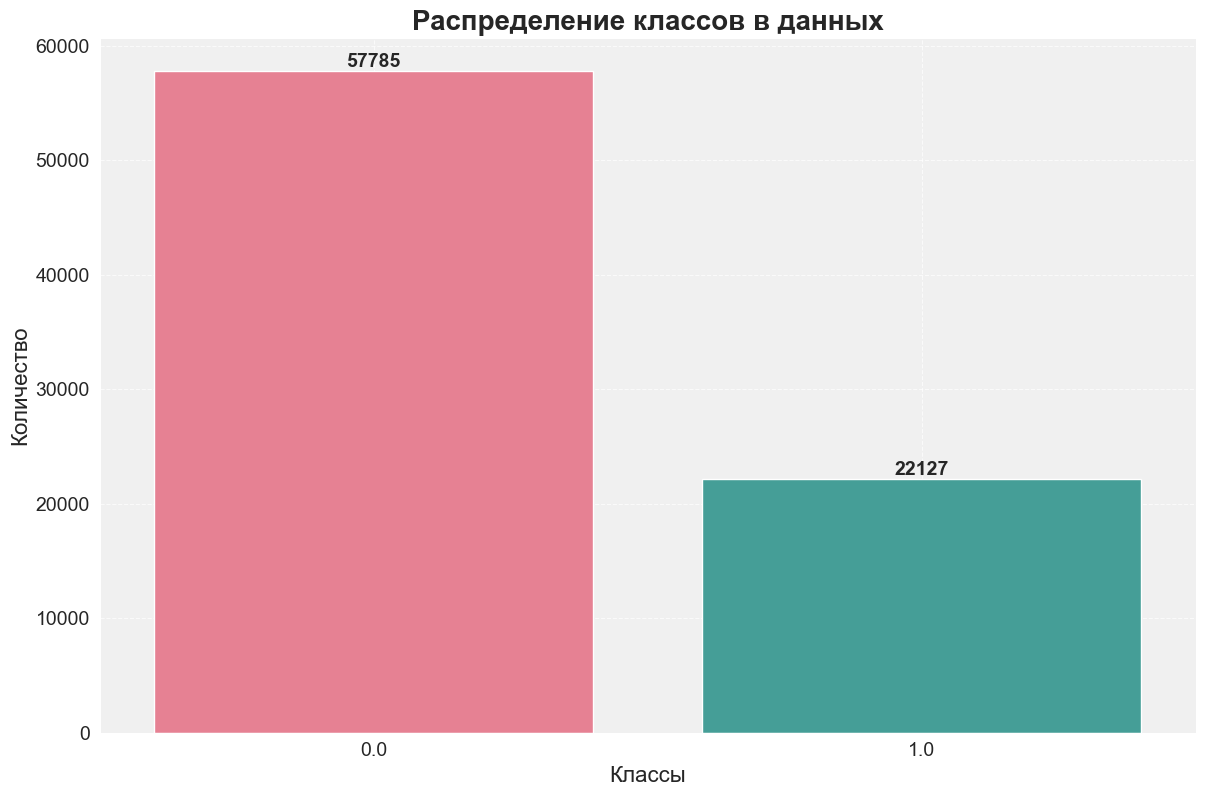

In [50]:
label_1_count = len(train_df[train_df['label'] == 1])
label_0_count = len(train_df[train_df['label'] == 0])
total_count = len(train_df)

print(f"Label 1: {label_1_count:,} ({label_1_count/total_count:.1%})")
print(f"Label 0: {label_0_count:,} ({label_0_count/total_count:.1%})")
print(f"Total: {total_count:,}")

sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))

colors = sns.color_palette("husl", 2)

ax = sns.barplot(x=train_df['label'].value_counts().index, 
                 y=train_df['label'].value_counts().values, 
                 palette=colors)

plt.title('Распределение классов в данных', fontsize=20, fontweight='bold')
plt.xlabel('Классы', fontsize=16)
plt.ylabel('Количество', fontsize=16)

for i, v in enumerate(train_df['label'].value_counts().values):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.tight_layout()

ax.grid(True, linestyle='--', alpha=0.7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax.set_facecolor('#f0f0f0')

plt.show()